In [1]:
from astropy.io import ascii 

In [56]:
#data = ascii.read('pulsars_gaia_xmatch.csv')
data = ascii.read('ipta_pulsars_gaia_xmatch.csv')

In [57]:
data.keys()

['angDist',
 'col1',
 'col2',
 'col3',
 'ra_ep2000',
 'dec_ep2000',
 'errHalfMaj',
 'errHalfMin',
 'errPosAng',
 'ra',
 'dec',
 'source_id',
 'ref_epoch',
 'ra_error',
 'dec_error',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'duplicated_source',
 'phot_g_n_obs',
 'phot_g_mean_flux',
 'phot_g_mean_flux_error',
 'phot_g_mean_mag',
 'phot_variable_flag',
 'l',
 'b']

In [58]:
data['phot_g_mean_mag']

20.255
18.209
19.557
19.042
20.31
16.264
20.56
17.995
19.323
16.19
14.464


In [59]:
from pygaia.errors.astrometric import parallaxErrorSkyAvg

In [60]:
sigmaPar=parallaxErrorSkyAvg(data['phot_g_mean_mag'], -0.5)

In [61]:
sigmaPar

764.413239046
155.291154722
426.738127815
284.110263824
801.324056738
49.0961397765
994.683909138
134.535895164
353.720383404
47.2409024277
20.2084526652


764.413239046
32.8793508045
155.291154722
426.738127815
284.110263824
801.324056738
49.0961397765
994.683909138
134.535895164
353.720383404
47.2409024277


In [33]:
1/5./(sigmaPar*1e-3)

0.468671503584
0.700180976507
0.4774894543
0.368045057913
2.39000413219
0.793100355089
0.262760632088
0.468291396326
0.386205090165
0.725829298004
0.980034982642


In [16]:
data['angDist']

0.119974
0.974099
4.838918
3.682673
2.277743
2.904775
1.055505
3.036515
3.905552
3.374726
2.065513


In [34]:
def gaussian(mean, sigma, array, amplitude=1.0):
    return amplitude/np.sqrt(2.*np.pi*sigma**2.)*np.exp(-(array - mean)**2./(2.*sigma**2.))

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [38]:
x = np.linspace(0.01, 10, 10000)

In [ ]:
distance = 100. #pc
parallax = 1/distance
plt.plot(x, gaussian(parallax, ))

In [53]:
distdata = ascii.read('ipta_pulsarDist_4Gaia.txt')

In [54]:
distdata.keys()

['name', 'distance', 'plus', 'minus']

In [55]:
distdata['distance']

0.156
0.9
0.7
0.49
1.2
0.5
0.42
1.1
1.5
0.8
5.0


In [73]:
distGaiaErr = sigmaPar*1e-3*distdata['distance']**2.

In [64]:
distdata['plus']

0.001
0.4
0.2
0.12
0.2
0.1
0.02
0.2
0.3
0.2
1.0


(0.1, 10)

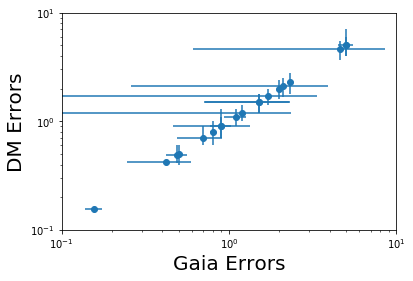

In [72]:
plt.errorbar(distdata['distance'], distdata['distance'], fmt='o', xerr=sigmaPar*1e-3*distdata['distance']**2., yerr=[distdata['minus'], distdata['plus']])
plt.xlabel('Gaia Errors', fontsize=20)
plt.ylabel('DM Errors', fontsize=20)
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.1, 10)
plt.ylim(0.1, 10)

Text(0,0.5,'DM Uncertainty')

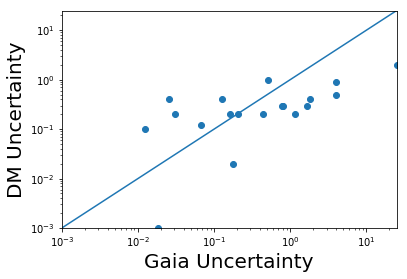

In [96]:
plt.scatter(distGaiaErr, distdata['plus'])
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.001, 25)
plt.ylim(0.001, 25)
plt.plot([0.001, 25], [0.001, 25])
plt.xlabel('Gaia Uncertainty', fontsize=20)
plt.ylabel('DM Uncertainty', fontsize=20)

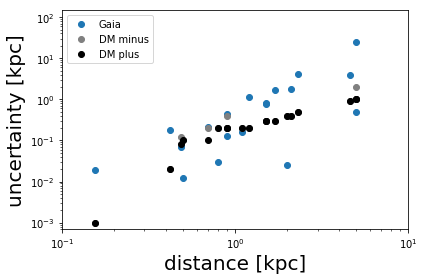

In [121]:
plt.scatter(distdata['distance'], distGaiaErr, label='Gaia')
plt.scatter(distdata['distance'], distdata['plus'], color='grey', label='DM minus')
plt.scatter(distdata['distance'], distdata['minus'], color='black', label='DM plus')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1, 10)
plt.ylim(0.0007, 150)
plt.xlabel('distance [kpc]', fontsize=20)
plt.ylabel('uncertainty [kpc]', fontsize=20)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('futureGaiaUncertainties.pdf')

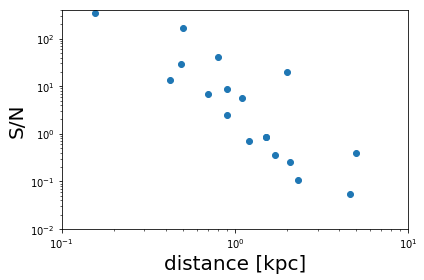

In [122]:
plt.scatter(distdata['distance'], 1./distdata['distance']/distGaiaErr)
plt.yscale('log')
plt.ylim(0.01, 400)
plt.xscale('log')
plt.xlim(0.1, 10)
plt.xlabel('distance [kpc]', fontsize=20)
plt.ylabel('S/N', fontsize=20)
plt.tight_layout()
plt.savefig('gaiaSN.pdf')